# Content
1. [Import dataSet](#1-Import-dataSet)

2. [rawData Visualization](#2.-rawData-Visualization)
    - [2.1 Plot all Features](2.1-Plot-all-Features)
    - [2.2 Plot two Features](#2.2-Plot-two-Features)
3. [Machine Learning](#3.-ML)
    - [3.1 Train/Test Dataset](#3.1-Train/Test-Dataset)
    - [3.2 Fit the Model](#3.2-Fit-the-Model)
    - [3.3 Evaluation](#3.3-Evaluation)
    - [3.4 Visualize support vectors](#3.4-Visualize-support-vectors)
    - [3.5 Plotting decision regions](#3.5-Plotting-decision-regions)
4. [compare ML models using lazypredict](#2-compare-ML-models-using-lazypredict)

## 1 Import dataSet

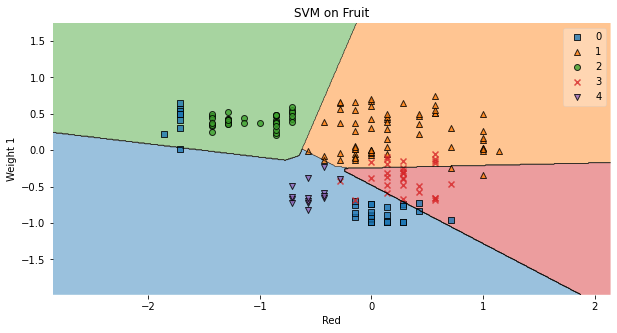

In [1]:
# !pip install ipynb
from ipynb.fs.full.ml_dataset import *

In [2]:
# ds

## 2. rawData Visualization

### 2.1 Plot all Features

In [3]:
# Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
aaa = pd.melt(ds)
# sns.scatterplot(data=aaa, x="variable", y="value")

<Figure size 648x432 with 0 Axes>

In [4]:
# Scatter Plot Matrix
import seaborn as sns
# sns.pairplot(ds)

In [5]:
# Plot Line Graphic
# print(len(ds))
plt.figure(figsize=(20,10))
x = np.linspace(0, len(ds), len(ds))
y = ds.loc[:,'Red':'Pot3']
# plt.plot(x,y,'-o')
# plt.show()

<Figure size 1440x720 with 0 Axes>

### 2.2 Plot two Features

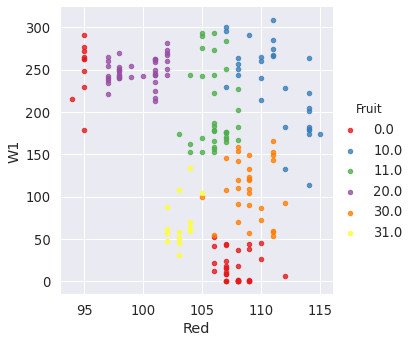

In [6]:
import seaborn as sns; sns.set(font_scale=1.2)
sns.lmplot('Red', 'W1', data=ds, hue='Fruit',
           palette='Set1', fit_reg=False, scatter_kws={"s": 20})

## 3. Machine Learning

### 3.1 Train/Test Dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

target_name = 'Fruit'
X = ds.drop('Fruit', axis=1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = ds[target_name]
# y = y.to_numpy().astype(int) # or # y = y.to_numpy(dtype='int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)

### 3.2 Fit the Model

In [8]:
from sklearn import svm
clf = svm.SVC(kernel='linear', gamma='auto', C=2)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
predictions

array([ 0., 10., 31., 30., 20., 30., 11., 30., 10., 11., 31., 10., 10.,
       11., 20., 20., 20.,  0., 20.,  0., 11., 10., 30.,  0.,  0., 20.,
        0.,  0., 11.])

### 3.3 Evaluation

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import classification_report

In [10]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
        10.0       1.00      1.00      1.00         5
        11.0       1.00      1.00      1.00         5
        20.0       1.00      1.00      1.00         6
        30.0       1.00      1.00      1.00         4
        31.0       1.00      1.00      1.00         2

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



Text(0.5, 1.0, 'Confusion matrix for our classifier')

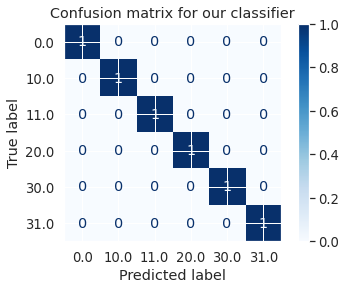

In [11]:
# Generate confusion matrix
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
# plt.show(matrix)
# plt.show()

### 3.4 Visualize support vectors

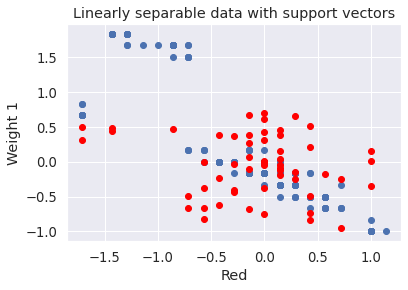

In [12]:
# Get support vectors
support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,3], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('Red')
plt.ylabel('Weight 1')
plt.show()

### 3.5 Plotting decision regions

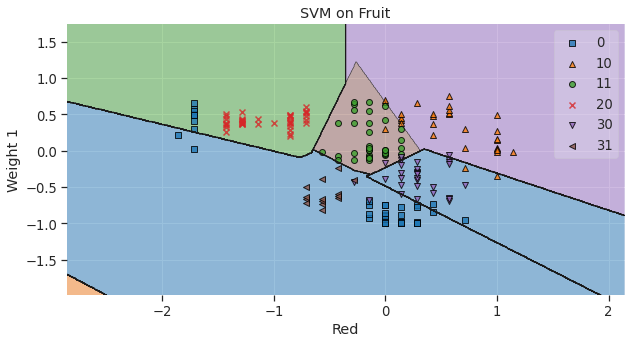

In [13]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

column = [0,3]
X1 = X[:, column]; #print(X1)
y1 = y.to_numpy().astype(int)
svm = SVC(C=2, kernel='linear')
svm.fit(X1, y1)

plt.figure(figsize=(10,5))
plot_decision_regions(X1, y1, clf=svm, filler_feature_values = 9)
plt.xlabel('Red')
plt.ylabel('Weight 1')
plt.title('SVM on Fruit')
plt.show()

## 2 compare ML models using lazypredict

In [14]:
# !pip install lazypredict
# !pip install xgboost
# !pip install lightgbm

In [15]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

/home/ash/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [16]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 30/30 [00:00<00:00, 38.17it/s]

[16:51:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [17]:
# Prints the model performance
train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.01
ExtraTreesClassifier,0.97,0.97,None,0.97,0.08
XGBClassifier,0.97,0.97,None,0.97,0.09
LGBMClassifier,0.97,0.97,None,0.97,0.09
LabelSpreading,0.90,0.90,None,0.90,0.01
SVC,0.90,0.90,None,0.89,0.01
LabelPropagation,0.90,0.90,None,0.90,0.01
PassiveAggressiveClassifier,0.90,0.89,None,0.90,0.01
SGDClassifier,0.90,0.89,None,0.90,0.01


In [18]:
test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.01
ExtraTreesClassifier,0.97,0.97,None,0.97,0.08
XGBClassifier,0.97,0.97,None,0.97,0.09
LGBMClassifier,0.97,0.97,None,0.97,0.09
LabelSpreading,0.90,0.90,None,0.90,0.01
SVC,0.90,0.90,None,0.89,0.01
LabelPropagation,0.90,0.90,None,0.90,0.01
PassiveAggressiveClassifier,0.90,0.89,None,0.90,0.01
SGDClassifier,0.90,0.89,None,0.90,0.01


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

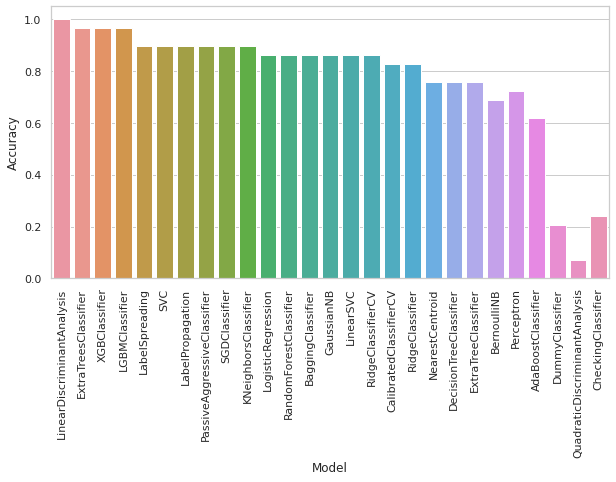

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
ax = sns.barplot(x=train.index, y="Accuracy", data=train)
plt.xticks(rotation=90)

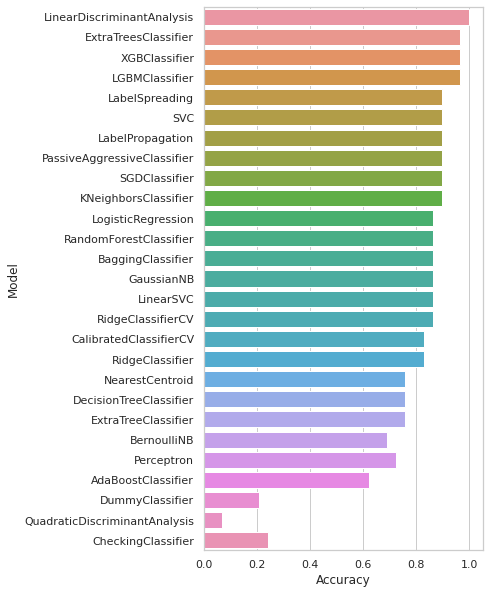

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set(style="whitegrid")
ax = sns.barplot(y=train.index, x="Accuracy", data=train)